# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Enrich Your Heatmaps With This Simple Trick

Post Link: [Substack](https://www.blog.dailydoseofds.com/p/enrich-your-heatmaps-with-this-simple)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7069966277594726400/)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1664200581165064192)

In [1]:
import string
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
values = np.array([[ 1. ,  0.5,  0.8,  0.5,  0.3, -0.7, -0.5, -0.5, -0.2, -0.1,  0.3],
                   [ 0.5,  1. ,  0.7,  0.8,  0.8, -0.2, -0.5, -0.9, -0.8, -0.8, -0.6],
                   [ 0.8,  0.7,  1. ,  0.8,  0.7, -0.6, -0.7, -0.9, -0.3, -0.2, -0.1],
                   [ 0.5,  0.8,  0.8,  1. ,  0.8, -0.6, -0.9, -0.9, -0.8, -0.4, -0.3],
                   [ 0.3,  0.8,  0.7,  0.8,  1. , -0.4, -0.8, -0.9, -0.8, -0.6, -0.5],
                   [-0.7, -0.2, -0.6, -0.6, -0.4,  1. ,  0.8,  0.5,  0.1, -0.3, -0.2],
                   [-0.5, -0.5, -0.7, -0.9, -0.8,  0.8,  1. ,  0.7,  0.5,  0.2,  0.2],
                   [-0.5, -0.9, -0.9, -0.9, -0.9,  0.5,  0.7,  1. ,  0.8,  0.7,  0.6],
                   [-0.2, -0.8, -0.3, -0.8, -0.8,  0.1,  0.5,  0.8,  1. ,  0.7,  0.7],
                   [-0.1, -0.8, -0.2, -0.4, -0.6, -0.3,  0.2,  0.7,  0.7,  1. ,  0.8],
                   [ 0.3, -0.6, -0.1, -0.3, -0.5, -0.2,  0.2,  0.6,  0.7,  0.8,  1. ]])

corr_matrix = pd.DataFrame(values, columns = list(string.ascii_uppercase[:values.shape[1]]))
corr_matrix = corr_matrix.set_index(corr_matrix.columns)

<IPython.core.display.Javascript object>

In [3]:
# Compute a correlation matrix and convert to long-form
corr_mat = corr_matrix.stack().reset_index(name="correlation")
corr_mat["abs_correlation"] = abs(corr_mat["correlation"])

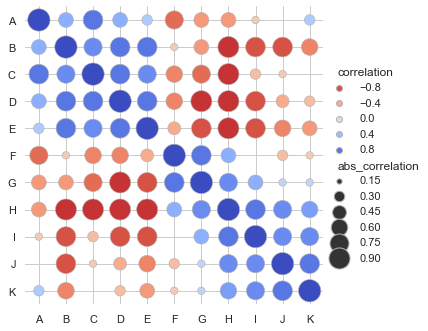

In [4]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="abs_correlation",
    palette="coolwarm_r", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(0, 500),
)

# Tweak the figure
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")